In [ ]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv(
    'https://gitlab.com/AnalyticsIndiaMagazine/practicedatasets/-/raw/main/bootcamp/polynomial_regression/Experience_Salaries.csv'
    )

In [ ]:
# Cheking the dataset
print(dataset)

                 Designation  Experience  Salary
0            Sales Executive           1   50000
1            Office Asistant           2   55000
2          Software Engineer           3   85000
3              Sales Manager           4  100000
4          Assistant Manager           5  125000
5                    HR Head           7  120000
6  Technical Project Manager           9  135000
7             Senior Manager          10  140000
8             Marketing Head          12  120000
9                   Director          15  220000


In [ ]:
# defining training features (X and y)
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [ ]:
# Checking the input feature
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 7]
 [ 9]
 [10]
 [12]
 [15]]


In [ ]:
# Checking the output feature
print(y)##it is an array not a vector

[ 50000  55000  85000 100000 125000 120000 135000 140000 120000 220000]


In [ ]:
# Reshaping the output feature
y = y.reshape(-1, 1)

In [ ]:
# Reshaped feature
print(y)

[[ 50000]
 [ 55000]
 [ 85000]
 [100000]
 [125000]
 [120000]
 [135000]
 [140000]
 [120000]
 [220000]]


In [ ]:
# Standardiing the input and output features
from sklearn.preprocessing import StandardScaler  ###SVM REQUIRES SCALED DATA
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [ ]:
# Standardized input values
print(X)

[[-1.32504382]
 [-1.09658799]
 [-0.86813216]
 [-0.63967633]
 [-0.4112205 ]
 [ 0.04569117]
 [ 0.50260283]
 [ 0.73105866]
 [ 1.18797032]
 [ 1.87333782]]


In [ ]:
# Standardized output values
print(y)

[[-1.41337749]
 [-1.30465615]
 [-0.65232807]
 [-0.32616404]
 [ 0.21744269]
 [ 0.10872135]
 [ 0.43488538]
 [ 0.54360673]
 [ 0.10872135]
 [ 2.28314826]]


In [ ]:
# Defining the support vector regressor
from sklearn.svm import SVR

# Training the support vector regressor
regressor = SVR(kernel = 'rbf')
regressor.fit(X, np.ravel(y))

SVR()

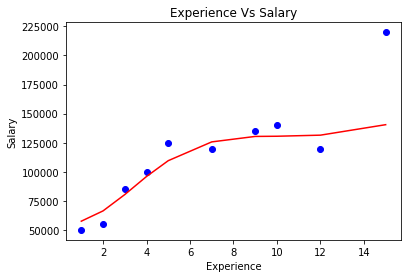

In [ ]:
# Performance of regressor on the training data
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'blue')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1, 1)), color = 'red')
plt.title('Experience Vs Salary')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

In [ ]:
# Predicting salary for a random experience
sc_y.inverse_transform(regressor.predict(sc_X.transform([[3.5]])).reshape(1, -1))

array([[88225.43336041]])